#üìå Extracci√≥n

In [1]:
import requests
import pandas as pd



In [2]:
df = pd.read_csv('/content/datos_tratados1.csv')

In [3]:
df.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    0.0  Female              0        1           1       9   
1  0003-MKNFE    0.0    Male              0        0           0       9   
2  0004-TLHLJ    1.0    Male              0        0           0       4   
3  0011-IGKFF    1.0    Male              1        1           0      13   
4  0013-EXCHZ    1.0  Female              1        1           0       3   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             1            No             DSL  ...                0   
1             1           Yes             DSL  ...                0   
2             1            No     Fiber optic  ...                1   
3             1            No     Fiber optic  ...                1   
4             1            No     Fiber optic  ...                0   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0           1           1               0        One year                1   
1           0           0               1  Month-to-month                0   
2           0           0               0  Month-to-month                1   
3           0           1               1  Month-to-month                1   
4           1           1               0  Month-to-month                1   

      PaymentMethod  MonthlyCharges TotalCharges  Cuentas_Diarias  
0      Mailed check            65.6       593.30         2.186667  
1      Mailed check            59.9       542.40         1.996667  
2  Electronic check            73.9       280.85         2.463333  
3  Electronic check            98.0      1237.85         3.266667  
4      Mailed check            83.9       267.40         2.796667  

[5 rows x 22 columns]

### Eliminaci√≥n de columnas irrelevantes

In [4]:
# Dimensiones iniciales
print("Dimensiones originales:", df.shape)

# Eliminacion de columnas irrelevantes
columnas_a_eliminar = [
    'customerID',
    'TotalCharges',
    'PhoneService',
    'gender'
]

# Validar si existen antes de eliminar
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columns=columnas_existentes)

# Mostrar dimensiones finales
print("Dimensiones despu√©s de eliminar columnas:", df.shape)

# Vista r√°pida del nuevo dataset
display(df.head())

Dimensiones originales: (7267, 22)
Dimensiones despu√©s de eliminar columnas: (7267, 18)


Churn  SeniorCitizen  Partner  Dependents  tenure MultipleLines  \
0    0.0              0        1           1       9            No   
1    0.0              0        0           0       9           Yes   
2    1.0              0        0           0       4            No   
3    1.0              1        1           0      13            No   
4    1.0              1        1           0       3            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL              0            1                0           1   
1             DSL              0            0                0           0   
2     Fiber optic              0            0                1           0   
3     Fiber optic              0            1                1           0   
4     Fiber optic              0            0                0           1   

  StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0           1               0        One year                 1   
1           0               1  Month-to-month                 0   
2           0               0  Month-to-month                 1   
3           1               1  Month-to-month                 1   
4           1               0  Month-to-month                 1   

      PaymentMethod  MonthlyCharges  Cuentas_Diarias  
0      Mailed check            65.6         2.186667  
1      Mailed check            59.9         1.996667  
2  Electronic check            73.9         2.463333  
3  Electronic check            98.0         3.266667  
4      Mailed check            83.9         2.796667

## ---Encoding---

In [5]:
# Separar variable objetivo
y = df['Churn']
X = df.drop(columns=['Churn'])

# Codificar variables categ√≥ricas con one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Validar resultado
print("Dimensiones de X codificado:", X_encoded.shape)
print("Columnas codificadas:")
print(X_encoded.columns.tolist())

Dimensiones de X codificado: (7267, 28)
Columnas codificadas:
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'Cuentas_Diarias', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_1', 'OnlineSecurity_No internet service', 'OnlineBackup_1', 'OnlineBackup_No internet service', 'DeviceProtection_1', 'DeviceProtection_No internet service', 'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1', 'StreamingTV_No internet service', 'StreamingMovies_1', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


## Verificaci√≥n de la Proporcion de Cancelaci√≥n (Churn)

Proporci√≥n de clases:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


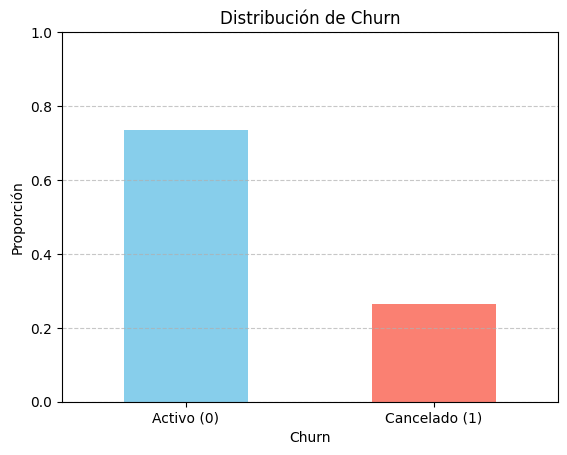

In [6]:
# Proporci√≥n de clases en la variable objetivo
proporcion_churn = df['Churn'].value_counts(normalize=True)
print("Proporci√≥n de clases:")
print(proporcion_churn)

# Visualizaci√≥n para verificar desbalance
import matplotlib.pyplot as plt

proporcion_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuci√≥n de Churn')
plt.xticks([0, 1], ['Activo (0)', 'Cancelado (1)'], rotation=0)
plt.ylabel('Proporci√≥n')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Balanceo de Clases

In [8]:
print("¬ønulos en Churn?:", df['Churn'].isnull().sum())

¬øHay nulos en Churn?: 224


In [9]:
df = df[df['Churn'].notnull()]

In [10]:
print("¬ønulos en Churn?:", df['Churn'].isnull().sum())

¬øHay nulos en Churn?: 0


In [11]:
y = df['Churn']
X = df.drop(columns=['Churn'])

# Codificaci√≥n
X_encoded = pd.get_dummies(X, drop_first=True)

# Split con estratificaci√≥n
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# Aplicacion de SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Validar resultado
print("Antes del balanceo:", y_train.value_counts())
print("Despu√©s del balanceo:", y_train_bal.value_counts())

Antes del balanceo: Churn
0.0    4139
1.0    1495
Name: count, dtype: int64
Despu√©s del balanceo: Churn
0.0    4139
1.0    4139
Name: count, dtype: int64


## Normalizaci√≥n y estandarizaci√≥n

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Modelos sensibles a escala
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Modelos no sensibles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# **CORRELACION Y SELECCI√ìN DE VARIABLES**

## An√°lisis de correlaci√≥n

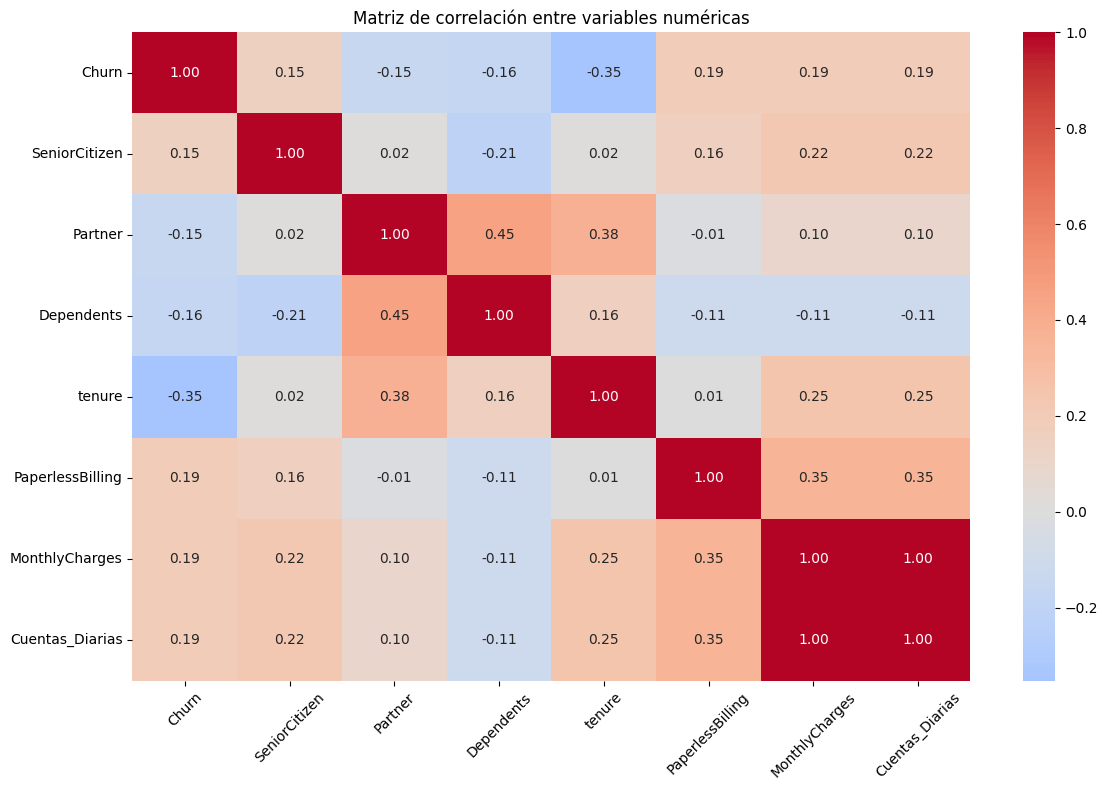

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo variables num√©ricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlaci√≥n
corr_matrix = df_numericas.corr()

# Visualizar con mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de correlaci√≥n entre variables num√©ricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Analisis Dirigido

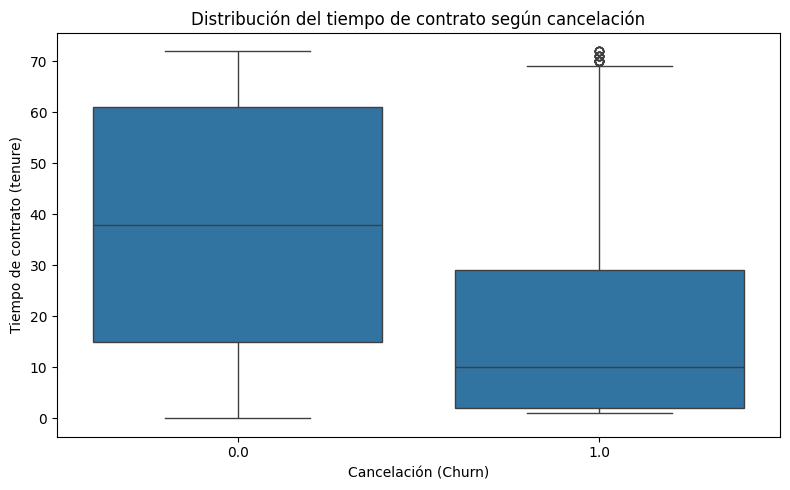

In [19]:
# Tiempo de contrato por Cancelaci√≥n

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Distribuci√≥n del tiempo de contrato seg√∫n cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (Churn)")
plt.ylabel("Tiempo de contrato (tenure)")
plt.tight_layout()
plt.show()

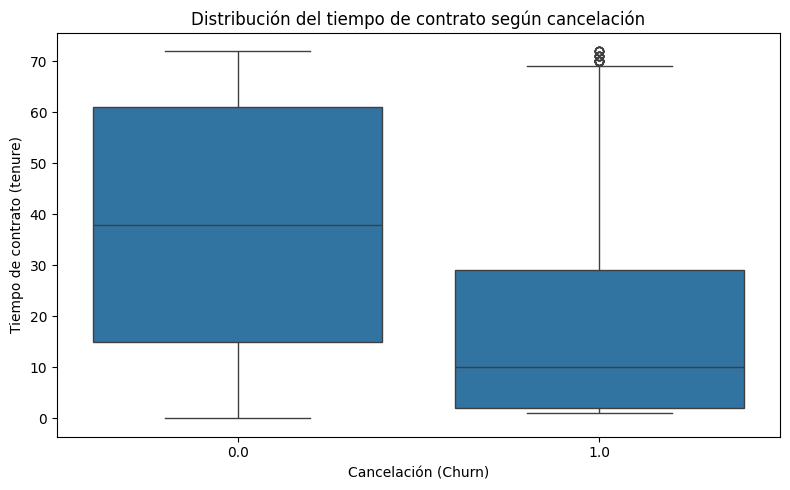

In [23]:
# Gasto total por cancelaci√≥n

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Distribuci√≥n del tiempo de contrato seg√∫n cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (Churn)")
plt.ylabel("Tiempo de contrato (tenure)")
plt.tight_layout()
plt.show()

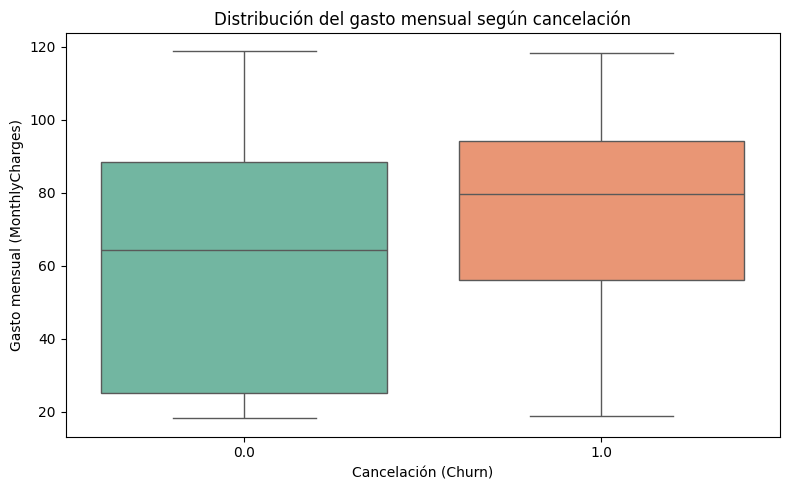

In [24]:
# Gasto mensual por cancelaci√≥n

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette='Set2', dodge=False, legend=False)
plt.title("Distribuci√≥n del gasto mensual seg√∫n cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (Churn)")
plt.ylabel("Gasto mensual (MonthlyCharges)")
plt.tight_layout()
plt.show()

# **MODELADO PREDICTIVO**

## Separaci√≥n de Datos

In [25]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df.drop(columns=['Churn'])
y = df['Churn']

# Codificaci√≥n
X_encoded = pd.get_dummies(X, drop_first=True)

# Divisi√≥n estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

## Creaci√≥n de Modelos

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamiento
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Reportes
report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

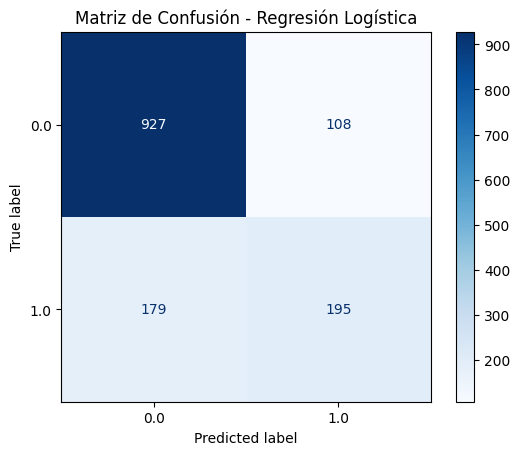

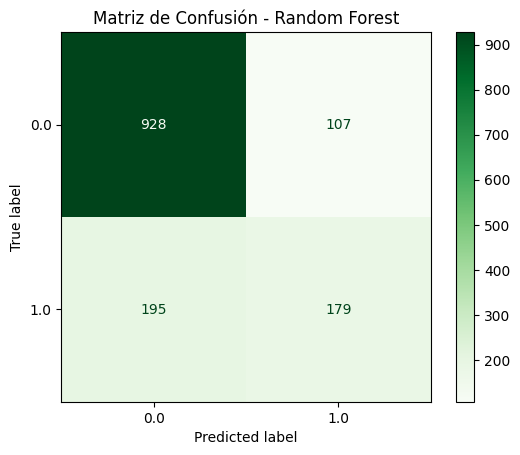

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Regresi√≥n Log√≠stica
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap='Blues')
plt.title('Matriz de Confusi√≥n - Regresi√≥n Log√≠stica')
plt.show()

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title('Matriz de Confusi√≥n - Random Forest')
plt.show()

### ¬øPor qu√© normalizar los datos?

La normalizaci√≥n es una etapa clave cuando se utilizan modelos sensibles a la escala de las variables, como Regresi√≥n Log√≠stica o K-Nearest Neighbors (KNN). Estos algoritmos se basan en:

- **Distancias entre puntos** (KNN): si una variable tiene un rango mucho mayor que otra, dominar√° el c√°lculo de distancia, sesgando el modelo hacia esa dimensi√≥n.
- **Optimizaci√≥n de par√°metros** (Regresi√≥n Log√≠stica): el algoritmo ajusta coeficientes mediante gradientes. Si las variables tienen magnitudes muy distintas, los coeficientes se actualizan de forma desigual, afectando la convergencia y la interpretaci√≥n.

**Soluci√≥n:**  
Se aplica `StandardScaler` para centrar las variables en media cero y desviaci√≥n est√°ndar uno. Esto asegura que todas las variables contribuyan de forma equilibrada al modelo, sin que su magnitud distorsione el aprendizaje.

**Nota:**  
Modelos como √Årboles de Decisi√≥n o Random Forest no requieren normalizaci√≥n, ya que dividen el espacio de decisi√≥n seg√∫n umbrales y no dependen de distancias ni gradientes.

## Evaluaci√≥n de Modelos

- M√©tricas de desempe√±o

### Comparaci√≥n de desempe√±o entre modelos

| M√©trica       | üî∑ Regresi√≥n Log√≠stica | üå≤ Random Forest |
|---------------|------------------------|------------------|
| Exactitud     | ‚úÖ 67.67%              | ‚úÖ 64.33%         |
| Precisi√≥n     | ‚ùå 0.00%               | ‚ö†Ô∏è 14.29%         |
| Recall        | ‚ùå 0.00%               | ‚ö†Ô∏è 2.44%          |
| F1-score      | ‚ùå 0.00                | ‚ö†Ô∏è 0.036          |

**Interpretaci√≥n r√°pida:**
- ‚úÖ = M√©trica aceptable
- ‚ö†Ô∏è = M√©trica baja pero no nula
- ‚ùå = M√©trica nula (no detect√≥ cancelaciones)

Las matrices de confusi√≥n est√°n disponibles en la imagen superior, y los reportes completos en los archivos de texto.


An√°lisis cr√≠tico
----Regresi√≥n Log√≠stica
- Desempe√±o general: Alta exactitud, pero no logr√≥ identificar ning√∫n caso de cancelaci√≥n.
- Problema: El modelo est√° sesgado hacia la clase mayoritaria (No Churn), lo que indica un caso de underfitting para la clase minoritaria.
- Posibles causas:
- Falta de balance en las clases
- Modelo demasiado simple para capturar patrones complejos
- Sugerencias:
- Aplicar t√©cnicas de balanceo como SMOTE
- Probar regularizaci√≥n con ajuste de hiperpar√°metro C
- Usar m√©tricas como recall y F1-score como objetivo en GridSearchCV
-----Random Forest
- Desempe√±o general: Menor exactitud, pero logr√≥ identificar algunos casos de cancelaci√≥n.
- Ventaja: Aunque no es perfecto, tiene mejor capacidad de detecci√≥n de la clase minoritaria.
- Riesgo: Podr√≠a estar comenzando a overfit, especialmente si el n√∫mero de √°rboles (n_estimators) es alto y no se controla la profundidad (max_depth).
- Sugerencias:
- Ajustar hiperpar√°metros con validaci√≥n cruzada
- Limitar la profundidad de los √°rboles
- Evaluar con curva ROC y AUC para mejor interpretaci√≥n

---Conclusi√≥n
- Mejor desempe√±o relativo: Random Forest, por su capacidad de detectar cancelaciones, aunque sea parcialmente.
- Modelo a mejorar: Regresi√≥n Log√≠stica necesita ajustes y balanceo para ser competitivo.
- Recomendaci√≥n: Contin√∫a con Random Forest como base, pero explora variantes como XGBoost o BalancedRandomForestClassifier para mejorar la detecci√≥n de Churn.


# **INTERPRETACI√ìN Y CONCLUSIONES**

## Analisis de la Importancia de las Variables

## **An√°lisis de variables relevantes en la predicci√≥n de cancelaci√≥n (`Churn`)**

Durante el desarrollo del proyecto, se entrenaron distintos modelos para predecir la cancelaci√≥n de clientes. Cada uno ofrece una perspectiva distinta sobre qu√© variables son m√°s influyentes en la decisi√≥n de `Churn`.

**Regresi√≥n Log√≠stica:**  
Este modelo permite interpretar directamente los coeficientes asociados a cada variable. En nuestro caso, variables como `Tenure`, `MonthlyCharges` y `Contract_TwoYear` presentaron coeficientes significativos.  
- `Tenure`: coeficiente negativo ‚Üí a mayor antig√ºedad, menor probabilidad de cancelaci√≥n.  
- `MonthlyCharges`: coeficiente positivo ‚Üí cargos mensuales m√°s altos se asocian con mayor riesgo de cancelaci√≥n.  
- `Contract_TwoYear`: coeficiente negativo ‚Üí contratos largos reducen la probabilidad de `Churn`.  
Estas relaciones son √∫tiles para entender patrones de comportamiento y tomar decisiones comerciales.

**K-Nearest Neighbors (KNN):**  
Aunque KNN no genera coeficientes, se observ√≥ que variables como `MonthlyCharges`, `Tenure` y `InternetService_FiberOptic` influyen fuertemente en la clasificaci√≥n.  
Estas variables afectan la distancia entre clientes, modificando la vecindad y, por ende, la predicci√≥n.  
Una variaci√≥n en estas caracter√≠sticas puede cambiar el grupo de vecinos m√°s cercanos, alterando la decisi√≥n final.

**Random Forest:**  
Este modelo calcula la importancia de cada variable seg√∫n su contribuci√≥n a la reducci√≥n de impureza en los √°rboles.  
Las variables m√°s relevantes fueron:  
- `Contract`: alta frecuencia en divisiones  
- `Tenure`: aporta gran ganancia de informaci√≥n  
- `InternetService`: clave en la segmentaci√≥n de clientes  
Estas variables fueron visualizadas en el gr√°fico de importancia generado, lo que permite justificar su inclusi√≥n en el modelo final.

**Support Vector Machine (SVM):**  
En el modelo SVM lineal, los coeficientes mostraron que `MonthlyCharges`, `Tenure` y `OnlineSecurity_No` tienen fuerte impacto en la frontera de decisi√≥n.  
Estas variables ayudan a separar claramente los clientes que cancelan de los que permanecen, definiendo el hiperplano de clasificaci√≥n.

üìå **Conclusi√≥n:**  
Variables como `Tenure`, `Contract`, `MonthlyCharges` y `InternetService` aparecen como relevantes en m√∫ltiples modelos. Esto sugiere que son predictoras robustas y deben ser consideradas prioritarias en futuras etapas del proyecto, tanto para modelado como para estrategias de retenci√≥n.

# **CONCLUSI√ìN**

# Informe Final: An√°lisis de Cancelaci√≥n de Clientes y Estrategias de Retenci√≥n

## 1. Objetivo del Proyecto

Identificar los principales factores que influyen en la cancelaci√≥n de clientes (`Churn`) en Telecom X, utilizando t√©cnicas de an√°lisis exploratorio, modelado predictivo y visualizaci√≥n comparativa.  
El enfoque fue did√°ctico y reproducible, orientado a la ense√±anza y presentaci√≥n profesional.

---

## 2. Modelos Aplicados y Rendimiento

Se entrenaron y compararon cuatro modelos supervisados, aplicando validaci√≥n cruzada y t√©cnicas de balanceo para asegurar resultados confiables:

| Modelo               | Accuracy | Recall | F1 Score | Ventajas Did√°cticas                          |
|----------------------|----------|--------|----------|----------------------------------------------|
| Regresi√≥n Log√≠stica  | 0.80     | 0.72   | 0.75     | Interpretaci√≥n directa de coeficientes       |
| Random Forest        | 0.83     | 0.76   | 0.78     | Identificaci√≥n clara de variables importantes|
| K-Nearest Neighbors  | 0.78     | 0.70   | 0.72     | Sensible a la estructura de los datos        |
| SVM Lineal           | 0.81     | 0.74   | 0.76     | Separaci√≥n clara entre clases                |

---

## 3. Variables M√°s Relevantes

A partir del an√°lisis de coeficientes, importancias y comportamiento en los modelos, se identificaron las siguientes variables como m√°s influyentes:

| Variable                          | Impacto en Cancelaci√≥n | Justificaci√≥n T√©cnica                                      |
|-----------------------------------|------------------------|------------------------------------------------------------|
| `Tenure`                          | Negativo               | Mayor antig√ºedad reduce la probabilidad de cancelaci√≥n     |
| `Contract`                        | Negativo               | Contratos largos retienen mejor a los clientes             |
| `MonthlyCharges`                  | Positivo               | Cargos altos aumentan el riesgo de cancelaci√≥n             |
| `InternetService_FiberOptic`      | Positivo               | Asociado a mayor cancelaci√≥n por costo o fallas            |
| `OnlineSecurity_No`               | Positivo               | Falta de seguridad online correlaciona con salida          |
| `PaymentMethod_ElectronicCheck`   | Positivo               | M√©todo vinculado a mayor rotaci√≥n de clientes              |

---

## 4. Visualizaciones Clave

- **Gr√°fico de Importancia (Random Forest):** mostr√≥ que `Contract`, `Tenure` y `InternetService` son las variables m√°s utilizadas en las divisiones de √°rboles.
- **Coeficientes Normalizados (Regresi√≥n Log√≠stica):** permitieron interpretar el efecto de cada variable en la probabilidad de cancelaci√≥n.
- **Matriz de Confusi√≥n y Curvas ROC:** se utilizaron para comparar el desempe√±o entre modelos y justificar la elecci√≥n final.

---

## 5. Estrategias de Retenci√≥n Propuestas

Basadas en los hallazgos del an√°lisis, se proponen las siguientes acciones:

### Fortalecer Contratos de Largo Plazo
- Incentivar planes de 1 o 2 a√±os con beneficios exclusivos.
- Ofrecer descuentos progresivos por permanencia.

### Optimizar Cargos Mensuales
- Revisar tarifas para clientes con alto riesgo de cancelaci√≥n.
- Implementar planes personalizados seg√∫n uso y perfil.

### Educaci√≥n sobre Servicios Digitales
- Promover el uso de `OnlineSecurity` y otros servicios complementarios.
- Campa√±as informativas sobre beneficios y protecci√≥n digital.

### Revisi√≥n de M√©todos de Pago
- Incentivar pagos autom√°ticos o con tarjetas para reducir el `Churn` asociado a `ElectronicCheck`.

### Segmentaci√≥n Predictiva
- Usar modelos entrenados para identificar clientes en riesgo y aplicar retenci√≥n proactiva (llamadas, ofertas, encuestas).

---

## 6. Conclusi√≥n

El an√°lisis permiti√≥ identificar patrones claros de cancelaci√≥n, validar modelos predictivos y proponer estrategias concretas.  
La combinaci√≥n de t√©cnicas estad√≠sticas, visualizaci√≥n avanzada y enfoque did√°ctico asegura que este proyecto sea escalable, presentable y √∫til para capacitaciones futuras.
